<a href="https://colab.research.google.com/github/Sweetydutta8/hello-world/blob/master/rainfall%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
from sklearn import linear_model
from subprocess import check_output


In [22]:
from google.colab import files
files=files.upload()

In [0]:
rainfall=pd.read_csv("datasets_1686_3183_rainfall in india 1901-2015.csv")

In [23]:
rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [11]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [0]:
rainfall.dropna(how='any',inplace=True)

In [13]:
#total number of names of subdivisions
subdivs=rainfall['SUBDIVISION'].unique()
num_of_subdivs=subdivs.size
print('Total number of subdivisions:'+ str(num_of_subdivs))
subdivs


Total number of subdivisions:36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


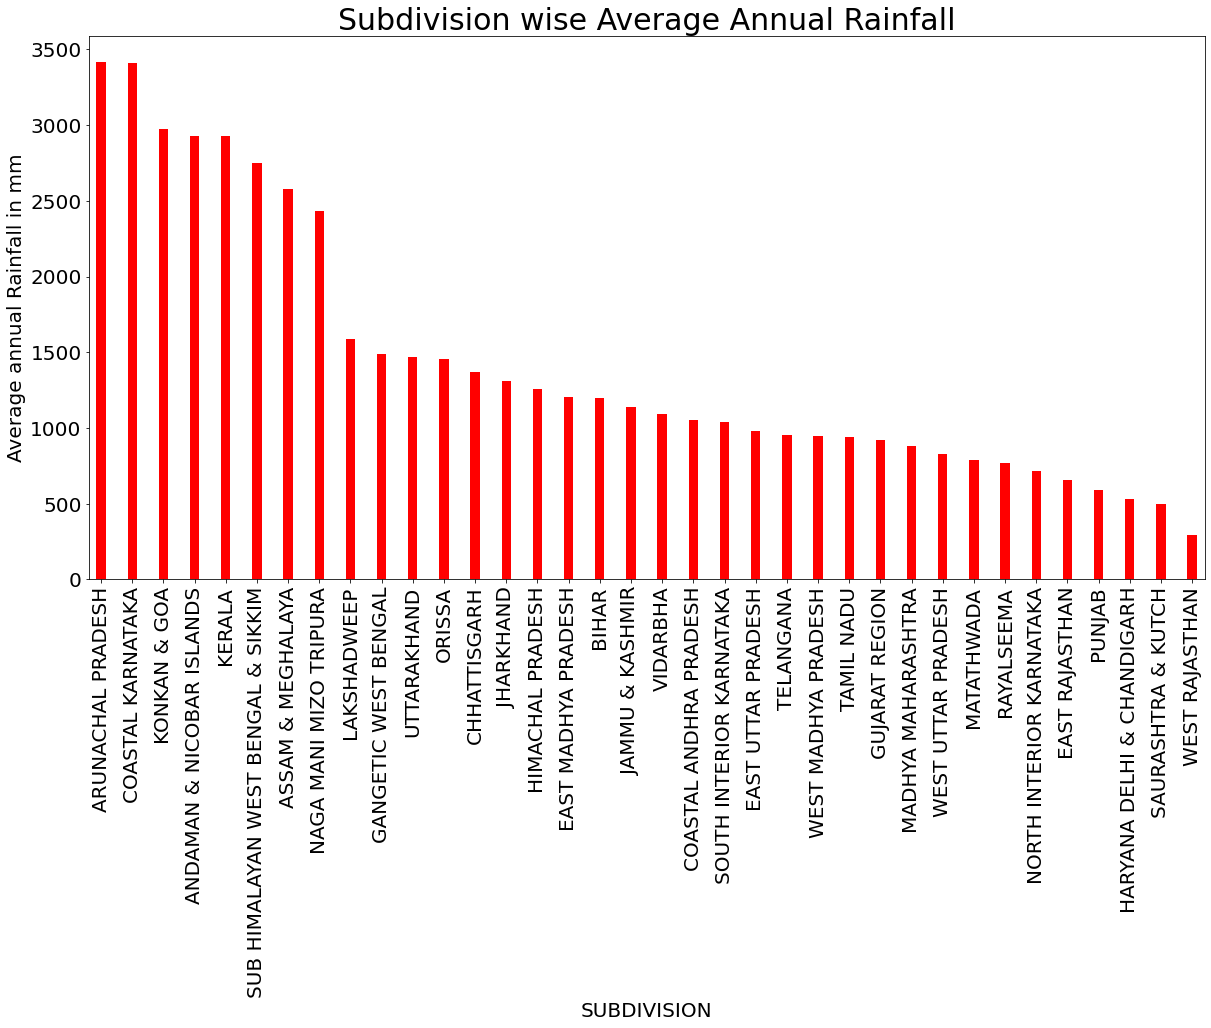

In [29]:
#average rainfall in each subdivision
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
rainfall.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r', width=0.3, title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Average annual Rainfall in mm')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(rainfall.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(rainfall.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33, 34, 35]])


In [0]:
#@title Default title text


Max:61815.600000000006occured in[1961]
Min:41273.6occured in[1972]
Mean:50182.83826086957


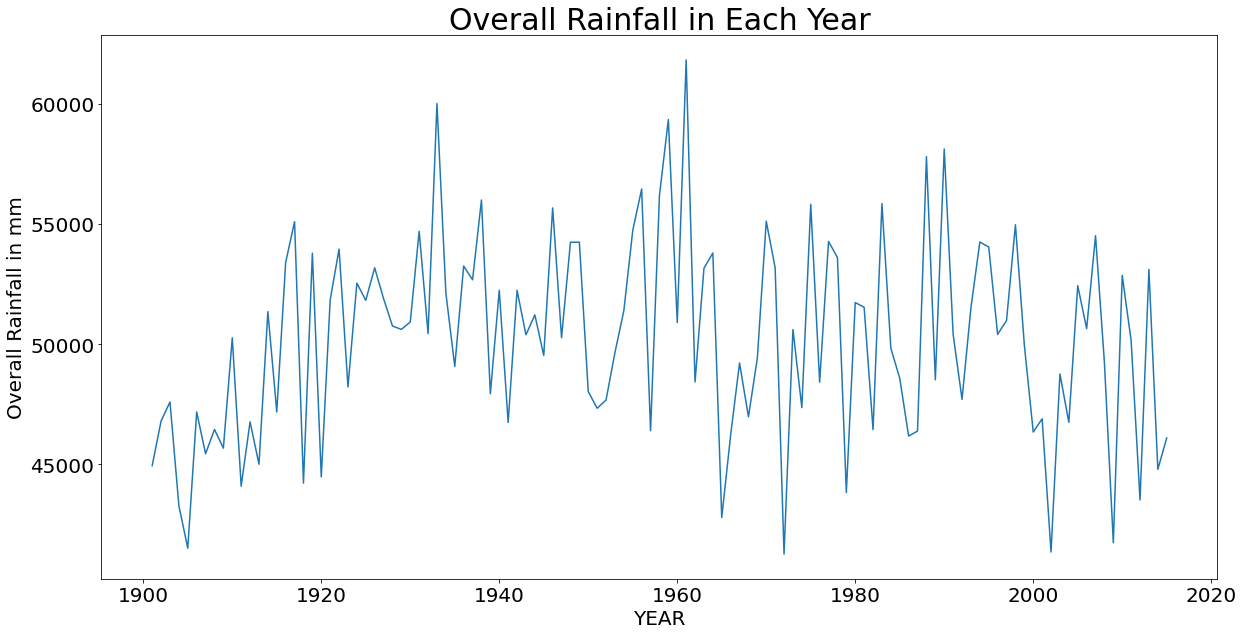

In [30]:
#total rainfall in each year
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
dfg=rainfall.groupby('YEAR').sum()['ANNUAL']
dfg.plot(kind='line', title='Overall Rainfall in Each Year', fontsize=20)


plt.ylabel('Overall Rainfall in mm')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

print('Max:' + str(dfg.max())+'occured in'+str(dfg.loc[dfg==dfg.max()].index.values[0:]))
print('Min:'+ str(dfg.min())+'occured in'+str(dfg.loc[dfg==dfg.min()].index.values[0:]))
print('Mean:'+str(dfg.mean()))


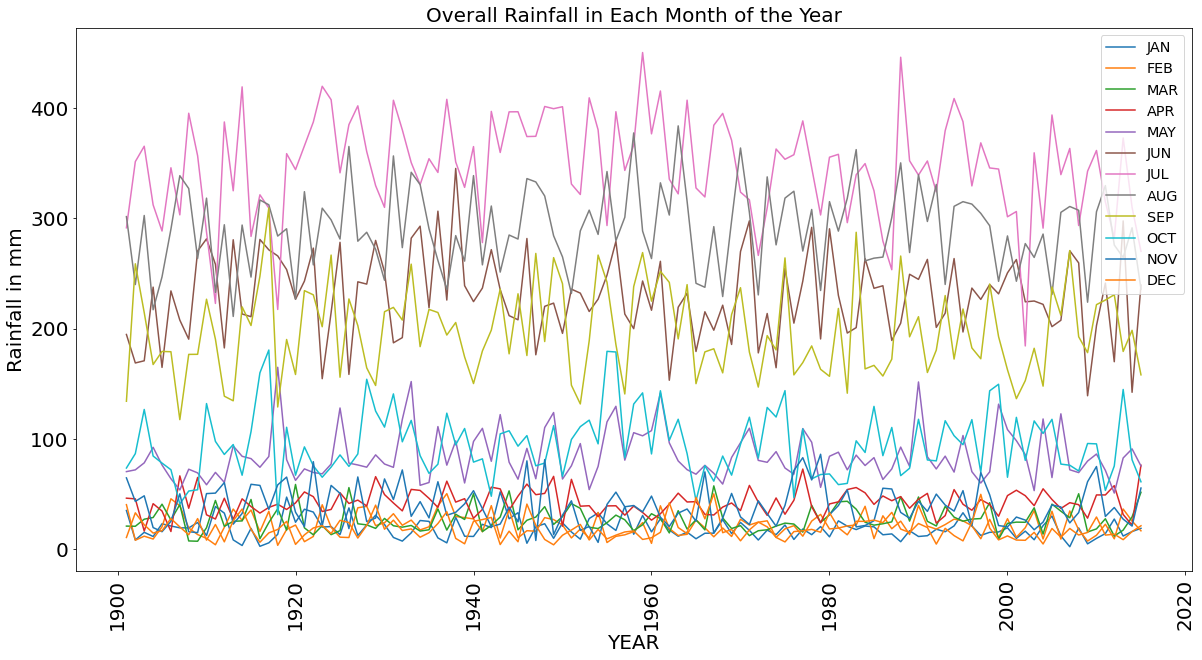

In [31]:
#monthly rainfall plot (yearwise)
months=rainfall.columns[2:14]
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
rainfall.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of the Year', ax=ax, fontsize=20)

plt.xticks(rotation=90)
plt.ylabel('Rainfall in mm')
plt.legend(loc='upper right', fontsize='x-large')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

MAD(Training_Data):93.33584473689697
MAD(TestData):95.12867015073174


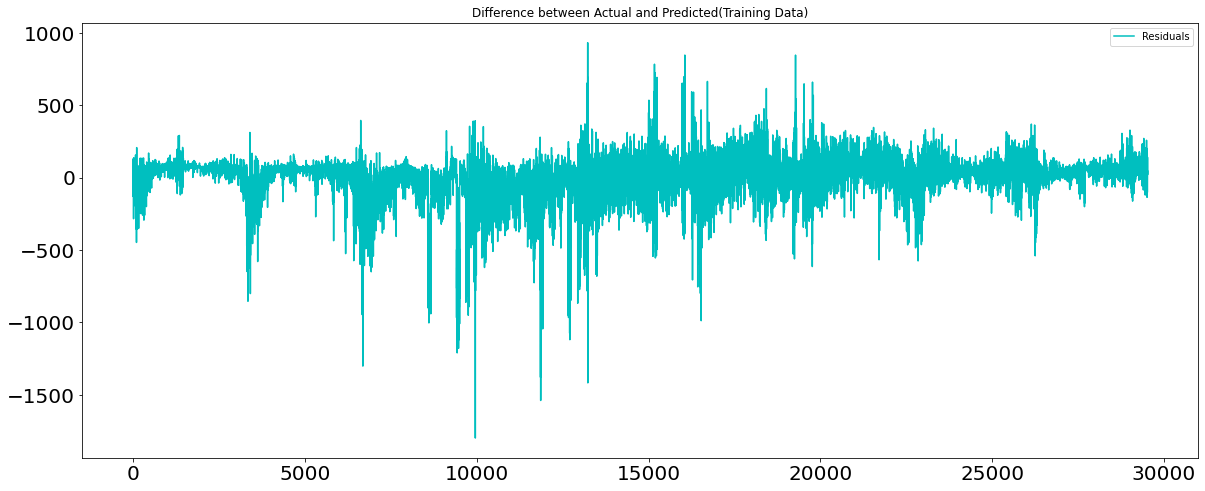

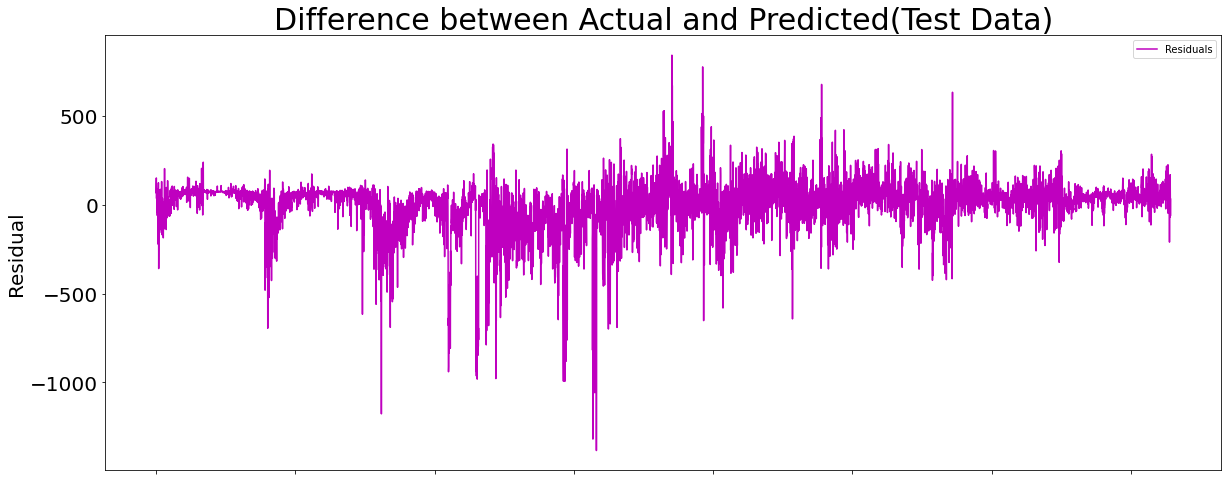

In [32]:
# making predictions using linear models ignoring the subdivisions
df2=rainfall[['SUBDIVISION', months[0],months[1],months[2],months[3]]]
df2.columns=np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
  df3=rainfall[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
  df3.columns=np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
  df2=df2.append(df3)


df2.index=range(df2.shape[0])
df2.drop('SUBDIVISION', axis=1, inplace=True)
msk=np.random.rand(len(df2)) < 0.8

rainfall_train=df2[msk]
rainfall_test=df2[~msk]
rainfall_train.index=range(rainfall_train.shape[0])
rainfall_test.index=range(rainfall_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(rainfall_train.drop('x4', axis=1),rainfall_train['x4'])
predicted_values=reg.predict(rainfall_train.drop('x4', axis=1))
residuals=predicted_values-rainfall_train['x4'].values
print('MAD(Training_Data):'+str(np.mean(np.abs(residuals))))
rainfall_res=pd.DataFrame(residuals)
rainfall_res.columns=['Residuals']

fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
rainfall_res.plot.line(title='Difference between Actual and Predicted(Training Data)', color='c', ax=ax, fontsize=20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

predicted_values=reg.predict(rainfall_test.drop('x4',axis=1))
residuals=predicted_values-rainfall_test['x4'].values
print('MAD(TestData):'+str(np.mean(np.abs(residuals))))

rainfall_res=pd.DataFrame(residuals)
rainfall_res.columns=['Residuals']


fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
rainfall_res.plot.line(title='Difference between Actual and Predicted(Test Data)', color='m', ax=ax, fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

MAD(Training Data):88.05530189822447
MAD(Test Data):88.98143270813519


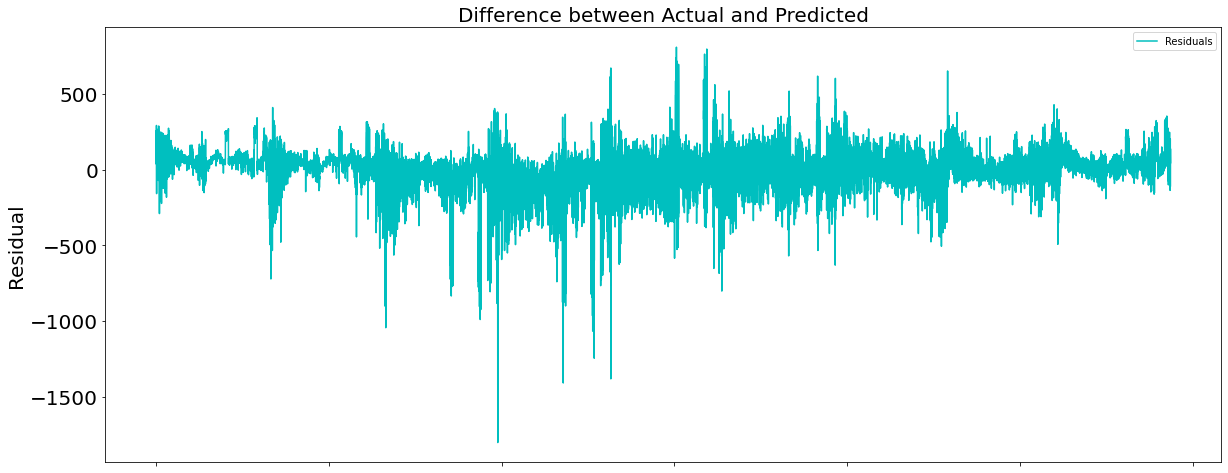

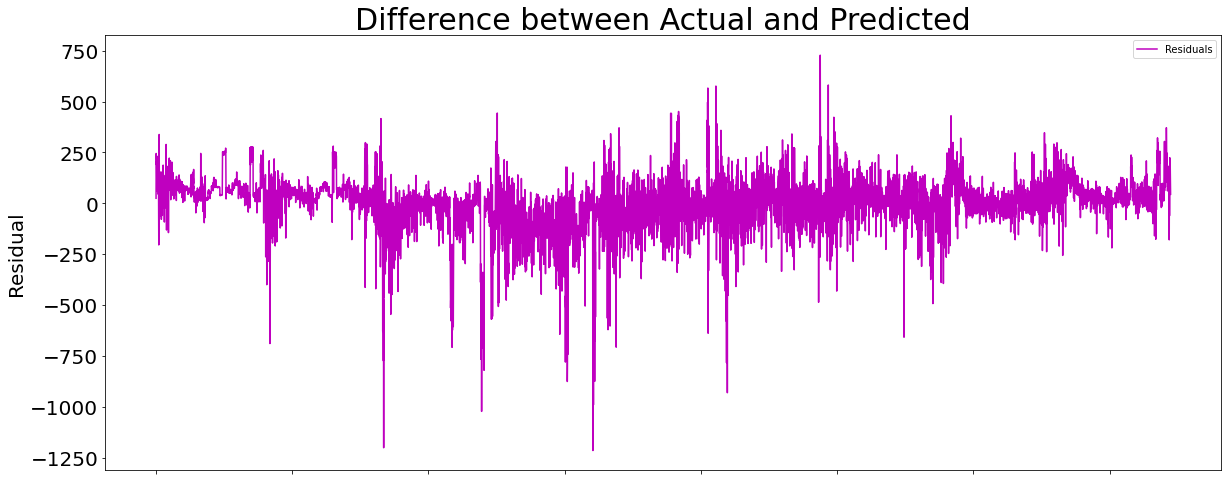

In [35]:
#applying linear model on whole data including subdivisions

df4=rainfall[['SUBDIVISION', months[0],months[1],months[2],months[3]]]
df4.columns=np.array(['SUBDIVISION','x1','x2','x3','x4'])

for k in range(1,9):
  df5=rainfall[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
  df5.columns=np.array(['SUBDIVISION','x1','x2','x3','x4'])
  df4=df4.append(df5)

df4.index=range(df4.shape[0])
df4=pd.concat([df4, pd.get_dummies(df4['SUBDIVISION'])], axis=1)

df4.drop('SUBDIVISION', axis=1, inplace=True)

msk=np.random.rand(len(df4))  < 0.8

rainfall_train=df4[msk]
rainfall_test=df4[~msk]
rainfall_train.index=range(rainfall_train.shape[0])
rainfall_test.index=range(rainfall_test.shape[0])

reg=linear_model.LinearRegression()
reg.fit(rainfall_train.drop('x4',axis=1),rainfall_train['x4'])

predicted_values=reg.predict(rainfall_train.drop('x4',axis=1))
residuals=predicted_values-rainfall_train['x4'].values
rainfall_res=pd.DataFrame(residuals)
rainfall_res.columns=['Residuals']
print('MAD(Training Data):'+str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
rainfall_res.plot.line(title='Difference between Actual and Predicted', color='c', ax=ax, fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

predicted_values=reg.predict(rainfall_test.drop('x4', axis=1))
residuals=predicted_values-rainfall_test['x4'].values 
rainfall_res=pd.DataFrame(residuals)
rainfall_res.columns=['Residuals']

print('MAD(Test Data):'+str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
rainfall_res.plot.line(title='Difference between Actual and Predicted', color='m', ax=ax, fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
